In [1]:
#!pip pip install numpy --upgrade
#!pip install scapy
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('KremlinRussia_E_tweets.csv')
df = df[['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Reply Count', 'Retweet Count']]
df.head()

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,Retweet Count
0,2022-02-27 17:54:45+00:00,1497993622326759446,#Moscow: Vladimir Putin visited the constructi...,KremlinRussia_E,6802,5900,880
1,2022-02-27 17:40:39+00:00,1497990075195531264,Vladimir Putin met with Defence Minister Serge...,KremlinRussia_E,3942,2509,637
2,2022-02-27 15:35:43+00:00,1497958634000719875,Telephone conversation with Prime Minister of ...,KremlinRussia_E,2754,2259,409
3,2022-02-27 12:36:51+00:00,1497913619962548226,The President congratulated Special Operations...,KremlinRussia_E,4889,4196,561
4,2022-02-26 18:57:59+00:00,1497647148019728394,Telephone conversation with Prime Minister of ...,KremlinRussia_E,4648,8931,541


In [4]:
df = df[['Datetime', 'Text', 'Like Count', 'Reply Count', 'Retweet Count']]
df.head()

,Datetime,Text,Like Count,Reply Count,Retweet Count
0,2022-02-27 17:54:45+00:00,#Moscow: Vladimir Putin visited the constructi...,6802,5900,880
1,2022-02-27 17:40:39+00:00,Vladimir Putin met with Defence Minister Serge...,3942,2509,637
2,2022-02-27 15:35:43+00:00,Telephone conversation with Prime Minister of ...,2754,2259,409
3,2022-02-27 12:36:51+00:00,The President congratulated Special Operations...,4889,4196,561
4,2022-02-26 18:57:59+00:00,Telephone conversation with Prime Minister of ...,4648,8931,541


In [5]:
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df.head()

,Datetime,Text,Like Count,Reply Count,Retweet Count,year,month
0,2022-02-27 17:54:45+00:00,#Moscow: Vladimir Putin visited the constructi...,6802,5900,880,2022,2
1,2022-02-27 17:40:39+00:00,Vladimir Putin met with Defence Minister Serge...,3942,2509,637,2022,2
2,2022-02-27 15:35:43+00:00,Telephone conversation with Prime Minister of ...,2754,2259,409,2022,2
3,2022-02-27 12:36:51+00:00,The President congratulated Special Operations...,4889,4196,561,2022,2
4,2022-02-26 18:57:59+00:00,Telephone conversation with Prime Minister of ...,4648,8931,541,2022,2


In [6]:
df['year'].value_counts()

2018    1037
2019     948
2017     898
2016     890
2014     867
2021     788
2015     755
2020     754
2012     686
2011     679
2013     651
2022     131
2010      91
Name: year, dtype: int64

In [7]:
df['Text'][0]

'#Moscow: Vladimir Putin visited the construction site of the National Space Centre https://t.co/MULxdSapha https://t.co/HbmwjRskCV'

In [8]:
pd.DataFrame(df.groupby(["year","month"])['Text'].count())

Text
year month      
2010 11       20
     12       71
2011 1        46
     2        47
     3        64
...          ...
2021 10       55
     11       55
     12       89
2022 1        45
     2        86

[136 rows x 1 columns]

most of the tweets are posted as the war begun...

##### Lets see for year 2022

In [9]:
df22 = df[df['year'] == 2022]
df22 = df22['Text']
df22.head()

0    #Moscow: Vladimir Putin visited the constructi...
1    Vladimir Putin met with Defence Minister Serge...
2    Telephone conversation with Prime Minister of ...
3    The President congratulated Special Operations...
4    Telephone conversation with Prime Minister of ...
Name: Text, dtype: object

In [10]:
#converting sentenses to words

all_sentences = []

for word in df22:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
        lines.append(w)

In [11]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [12]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    

In [13]:
#Removing all Stop Words
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)



In [14]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [15]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 451, 2: 83, 3: 37, 4: 20, 5: 12, 9: 7, 6: 6, 7: 5, 10: 3, 40: 2, ...})

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


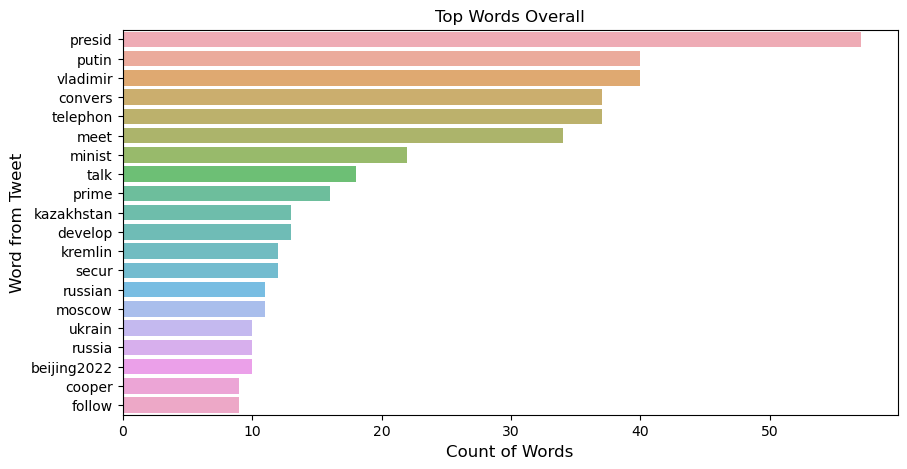

In [16]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


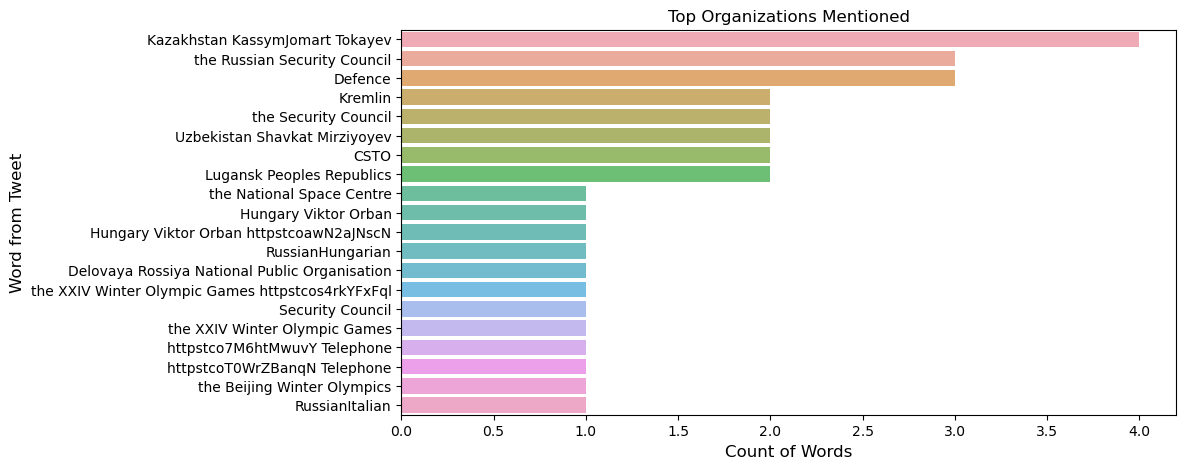

In [17]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
            
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()


df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


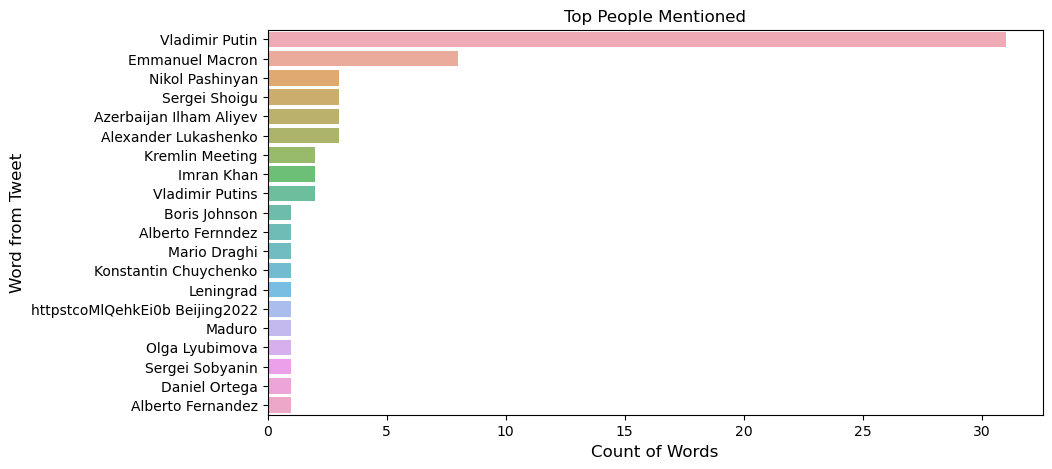

In [18]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df10 = pd.DataFrame(label, columns = ['Word','Entity'])
df10 = df10.where(df10['Entity'] == 'PERSON')
df11 = df10['Word'].value_counts()
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()